In [7]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time

Monte Carlo ES: average steps = 6.71, average rewards = 0.03
Time taken for ES to run: 0.13242888450622559 seconds


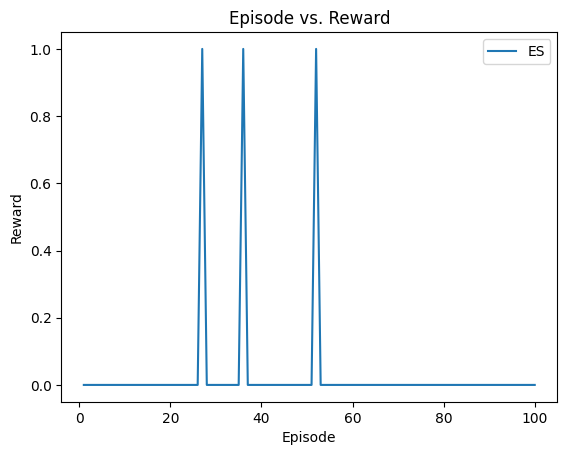

In [8]:
env = gym.make('FrozenLake-v1')
# Set hyperparameters
num_episodes = 100
gamma = 0.9
epsilon = 0.9

# Initialize Q-values
Q = np.zeros((env.observation_space.n, env.action_space.n))
returns = {}

# Define function to choose an action

def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

start_time = time.time()

# Run Monte Carlo ES algorithm
steps_es = []
rewards_es=[]
for i in range(num_episodes):
    episode_states = []
    episode_actions = []
    episode_rewards = []
    state = env.reset()
    done = False

    # Choose starting action randomly
    action = env.action_space.sample()

    # Play episode and store states, actions, and rewards
    while not done:
        episode_states.append(state)
        episode_actions.append(action)
        state, reward, done, _ = env.step(action)
        episode_rewards.append(reward)

        # Choose next action using epsilon-greedy policy
        action = choose_action(state)

    # Calculate returns and update Q-values
    G = 0
    for t in range(len(episode_states)-1, -1, -1):
        s = episode_states[t]
        a = episode_actions[t]
        r = episode_rewards[t]
        G = gamma * G + r
        if (s, a) not in episode_states[:t]:
            if (s, a) not in returns:
                returns[(s, a)] = []
            returns[(s, a)].append(G)
            Q[s][a] = np.mean(returns[(s, a)])

    # Calculate steps
    steps_es.append(len(episode_states))
    rewards_es.append(sum(episode_rewards))
end_time = time.time()
# Print results
print(f"Monte Carlo ES: average steps = {np.mean(steps_es)}, average rewards = {np.mean(rewards_es)}")
print("Time taken for ES to run:", end_time - start_time, "seconds")


# Plot the episode vs. reward graph for SARSA
plt.plot(range(1, num_episodes+1), rewards_es, label='ES')
plt.title('Episode vs. Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()